In [98]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Colorado

Note: marijuana legalized in 2012

### Colorado Sales

In [99]:
tax = pd.read_csv('./datasets/bdc/Marijuana_Sales_Tax_Revenue_in_Colorado.csv')
tax.describe()

,Month,Year,Med_Tax_Rev,Rec_Tax_Rev
count,1702.000000,1702.000000,1470.000000,937.000000
mean,6.621622,2016.272033,37445.813639,68106.806542
std,3.367228,1.355427,93289.169232,124510.511870
min,1.000000,2014.000000,-5267.000000,0.000000
25%,4.000000,2015.000000,1215.750000,11079.000000
50%,7.000000,2016.000000,6619.000000,25874.000000
75%,10.000000,2017.000000,23715.000000,69020.000000
max,12.000000,2018.000000,593786.000000,885739.000000


In [100]:
tax = tax[['Year', 'Med_Tax_Rev', 'Rec_Tax_Rev']]
tax.shape

(1702, 3)

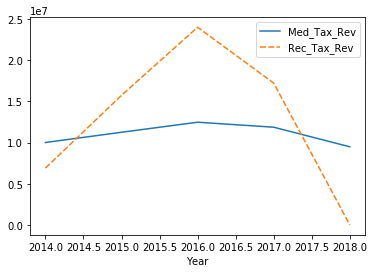

In [101]:
tax_yr = tax.groupby('Year').sum()
sns.lineplot(data=tax_yr)
plt.show()

### Opiod Overdose Deaths

https://data.world/health/opioid-overdose-deaths

In [102]:
deaths = pd.read_csv('./datasets/bdc/Multiple Cause of Death, 1999-2014 v1.1.csv')
deaths.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46,4447100,1,0.8,1.4,126
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149


In [103]:
deaths.shape

(816, 8)

In [104]:
deaths.dtypes

State                                                              object
Year                                                                int64
Deaths                                                             object
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [105]:
deaths['Deaths'].value_counts()

Suppressed    13
14             7
29             7
47             6
112            6
46             6
34             6
10             6
32             6
60             5
52             5
134            5
54             5
41             5
94             5
185            4
48             4
61             4
17             4
53             4
16             4
13             4
203            4
158            4
108            4
45             4
57             4
26             4
175            4
33             4
              ..
1204           1
121            1
404            1
934            1
979            1
385            1
1171           1
414            1
663            1
193            1
187            1
379            1
2057           1
602            1
582            1
128            1
292            1
538            1
1383           1
403            1
726            1
247            1
11             1
591            1
97             1
584            1
711            1
970           

In [106]:
deaths = deaths[deaths['Deaths'] != 'Suppressed']
deaths[deaths['Deaths'] == 'Suppressed'] 

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions)


In [107]:
deaths.Deaths = deaths.Deaths.astype(np.int64)

In [108]:
deaths.dtypes

State                                                              object
Year                                                                int64
Deaths                                                              int64
Population                                                          int64
Crude Rate                                                         object
Crude Rate Lower 95% Confidence Interval                           object
Crude Rate Upper 95% Confidence Interval                           object
Prescriptions Dispensed by US Retailers in that year (millions)     int64
dtype: object

In [109]:
deaths['Deaths per Population'] = deaths['Deaths'] / deaths['Population']

In [110]:
deaths_col = deaths[deaths['State'] == 'Colorado']
deaths_col

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),Deaths per Population
80,Colorado,1999,169,4226018,4,3.4,4.6,116,0.000040
81,Colorado,2000,184,4301261,4.3,3.7,4.9,126,0.000043
82,Colorado,2001,204,4425687,4.6,4,5.2,138,0.000046
83,Colorado,2002,206,4490406,4.6,4,5.2,142,0.000046
84,Colorado,2003,229,4528732,5.1,4.4,5.7,149,0.000051
85,Colorado,2004,233,4575013,5.1,4.4,5.7,155,0.000051
86,Colorado,2005,310,4631888,6.7,5.9,7.4,163,0.000067
87,Colorado,2006,337,4720423,7.1,6.4,7.9,174,0.000071
88,Colorado,2007,368,4803868,7.7,6.9,8.4,184,0.000077
89,Colorado,2008,365,4889730,7.5,6.7,8.2,196,0.000075


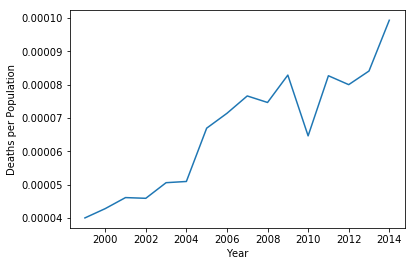

In [111]:
sns.lineplot(x='Year', y='Deaths per Population', data=deaths_col)
plt.show()

### Crime Rate

https://data.world/carlvlewis/u-s-metro-areas-violent-crime-rates-by-type-1970-2015

In [112]:
crime = pd.read_csv('./datasets/bdc/ucr_crime_1975_2015.csv')
crime.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN


In [113]:
crime.shape

(2829, 17)

In [114]:
crime.describe()

,year,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k
count,2829.000000,2.760000e+03,2795.000000,2754.000000,2754.000000,2753.000000,2.794000e+03,2692.000000,2794.000000,2795.000000,2754.000000,2754.000000,2753.000000
mean,1995.000000,7.956981e+05,398.385331,416.278867,4000.245098,4405.146023,2.963255e+04,11.868871,1093.049952,15.372760,59.305140,459.968134,566.595538
std,11.834251,1.012451e+06,2281.276402,479.811934,8653.902965,6977.293769,1.728630e+05,1.118194,676.884703,12.350651,31.971735,340.903545,369.437018
min,1975.000000,1.007630e+05,1.000000,15.000000,83.000000,15.000000,1.540000e+02,0.000000,16.494563,0.205464,1.640771,11.460508,1.606613
25%,1985.000000,3.779310e+05,32.000000,176.250000,1032.000000,1467.000000,3.014750e+03,12.000000,625.082639,6.955241,35.773523,210.245093,319.091928
50%,1995.000000,5.366145e+05,64.000000,291.000000,1940.000000,2597.000000,5.135500e+03,12.000000,949.676451,11.984468,55.900545,374.398220,487.484783
75%,2005.000000,8.168558e+05,131.000000,465.000000,3609.750000,4556.000000,9.058500e+03,12.000000,1409.508836,20.231759,77.795869,612.005983,728.238584
max,2015.000000,8.550861e+06,24703.000000,3899.000000,107475.000000,71030.000000,1.932274e+06,12.000000,4352.834209,94.735602,199.301908,2337.518708,2368.216602


In [115]:
deps = []

for dep in crime['department_name']:
    if 'colo' in dep.lower():
        deps.append(dep)
print(len(deps))
print(deps)

41
['Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.', 'Aurora, Colo.']


In [116]:
crime_aurora = crime[crime['department_name'] == 'Aurora, Colo.']
crime_aurora.shape

(41, 17)

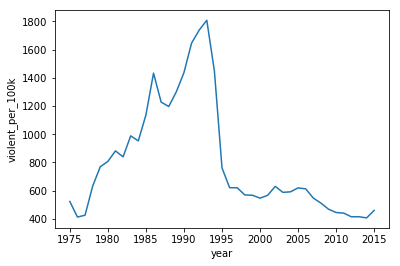

In [117]:
sns.lineplot(x='year', y='violent_per_100k', data=crime_aurora)
plt.show()

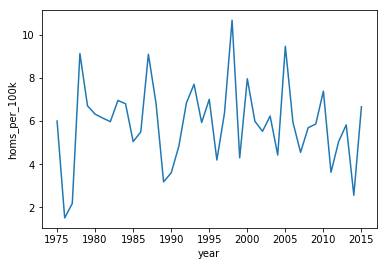

In [118]:
sns.lineplot(x='year', y='homs_per_100k', data=crime_aurora)
plt.show()

### Opioid Deaths

https://public.opendatasoft.com/explore/dataset/opioid-overdose-deaths-by-type-of-opioid/export/

In [119]:
deaths2 = pd.read_csv('datasets/bdc/opioid-overdose-deaths-by-type-of-opioid.csv', sep=';')
deaths2.head()

,Location,Year,Heroin,Heroin (missing reason),Methadone,Methadone (missing reason),"Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)","Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)","Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)",Footnotes
0,Alabama,2014,122.0,NaN,44.0,NaN,90.0,NaN,47.0,NaN,NaN
1,South Carolina,2013,32.0,NaN,50.0,NaN,144.0,NaN,50.0,NaN,NaN
2,Colorado,2011,79.0,NaN,61.0,NaN,198.0,NaN,78.0,NaN,NaN
3,Mississippi,2011,NaN,Not sufficient data. Data supressed to ensure ...,14.0,NaN,48.0,NaN,18.0,NaN,NaN
4,Utah,2011,73.0,NaN,75.0,NaN,280.0,NaN,56.0,NaN,NaN


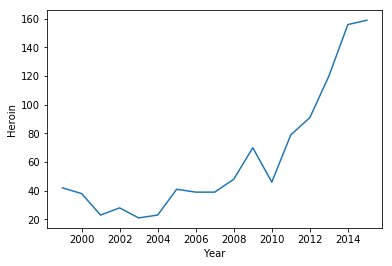

In [120]:
deaths2_col = deaths2[deaths2['Location'] == 'Colorado']
sns.lineplot(x='Year', y='Heroin', data=deaths2_col)
plt.show()

In [121]:
deaths2.columns

Index(['Location', 'Year', 'Heroin', 'Heroin (missing reason)', 'Methadone',
       'Methadone (missing reason)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
       'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone) (missing reason)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)',
       'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol) (missing reason)',
       'Footnotes'],
      dtype='object')

In [122]:
columns = ['Location', 'Year', 'Heroin', 'Methadone',
           'Natural and Semisynthetic Opioids (e.g. oxycodone, hydrocodone)',
           'Synthetic Opioids, other than Methadone (e.g. fentanyl, tramadol)'
          ]
deaths2 = deaths2[columns]
deaths2_col = deaths2_col[columns]

In [123]:
deaths2.shape

(867, 6)

In [124]:
columns = ['Location', 'Year', 'Heroin', 'Methadone',
           'Natural and Semisynthetic Opioids',
           'Synthetic Opioids']

deaths2.columns = columns
deaths2_col.columns = columns

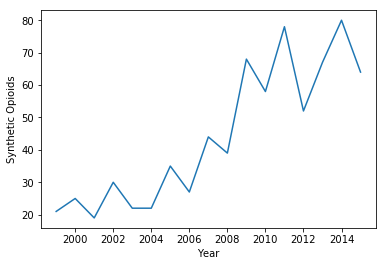

In [125]:
sns.lineplot(x='Year', y='Synthetic Opioids', data=deaths2_col)
plt.show()

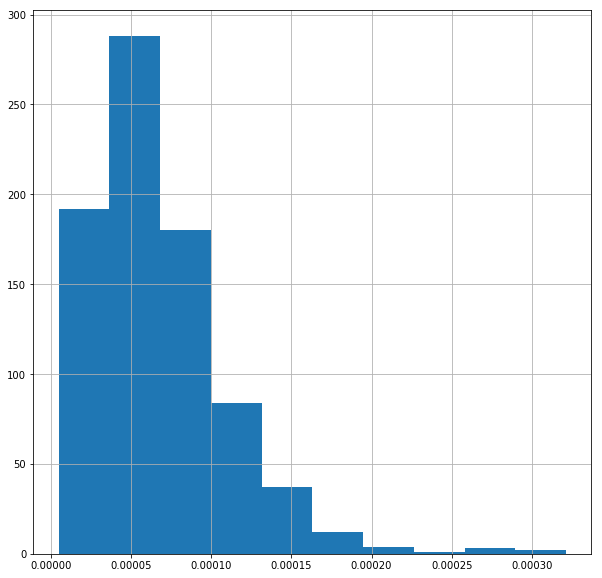

In [126]:
deaths['Deaths per Population'].hist(figsize=(10, 10))
plt.show()

In [127]:
deaths[['Year', 'Deaths per Population']][deaths['State'] == 'Colorado']

,Year,Deaths per Population
80,1999,0.000040
81,2000,0.000043
82,2001,0.000046
83,2002,0.000046
84,2003,0.000051
85,2004,0.000051
86,2005,0.000067
87,2006,0.000071
88,2007,0.000077
89,2008,0.000075


In [128]:
deaths['State'].value_counts()

Michigan                16
Arizona                 16
Oregon                  16
Vermont                 16
District of Columbia    16
Alabama                 16
North Carolina          16
Mississippi             16
Delaware                16
Illinois                16
Colorado                16
Wisconsin               16
Maine                   16
Nevada                  16
Utah                    16
Texas                   16
California              16
Kansas                  16
Tennessee               16
Iowa                    16
Montana                 16
Georgia                 16
Minnesota               16
Rhode Island            16
Missouri                16
Hawaii                  16
Kentucky                16
New York                16
Pennsylvania            16
Indiana                 16
West Virginia           16
Washington              16
Massachusetts           16
Florida                 16
Oklahoma                16
Maryland                16
Virginia                16
C

In [129]:
deaths2['Year'].value_counts()

2015    51
2006    51
2000    51
2001    51
2002    51
2003    51
2004    51
2005    51
2007    51
2014    51
2008    51
2009    51
2010    51
2011    51
2012    51
2013    51
1999    51
Name: Year, dtype: int64

In [130]:
print(deaths2.columns)
print(deaths.columns)

Index(['Location', 'Year', 'Heroin', 'Methadone',
       'Natural and Semisynthetic Opioids', 'Synthetic Opioids'],
      dtype='object')
Index(['State', 'Year', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval',
       'Prescriptions Dispensed by US Retailers in that year (millions)',
       'Deaths per Population'],
      dtype='object')


In [131]:
columns = ['State', 'Year', 'Deaths', 'Population', 'Deaths per Population']
deaths = deaths[columns]

In [132]:
deaths2['Heroin'][deaths2['Location'] == 'Mississippi']

3       NaN
32     23.0
120    38.0
240     NaN
263     NaN
272     NaN
279     NaN
301     NaN
471    10.0
483     NaN
503     NaN
522     NaN
545     NaN
615     NaN
717     NaN
757     NaN
792     NaN
Name: Heroin, dtype: float64

In [133]:
deaths2 = deaths2.dropna()
deaths = deaths.dropna()
print(deaths.shape)
print(deaths2.shape)

(803, 5)
(499, 6)


In [134]:
df_death = pd.merge(deaths, deaths2, how='right', left_on=['State', 'Year'], right_on=['Location', 'Year'])
print(df_death.shape)
df_death.head()

(499, 10)


,State,Year,Deaths,Population,Deaths per Population,Location,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids
0,Alabama,2009,210.0,4757938.0,0.000044,Alabama,12.0,88.0,92.0,31.0
1,Alabama,2011,180.0,4802740.0,0.000037,Alabama,14.0,63.0,92.0,19.0
2,Alabama,2012,175.0,4822023.0,0.000036,Alabama,35.0,55.0,62.0,16.0
3,Alabama,2013,175.0,4833722.0,0.000036,Alabama,40.0,41.0,65.0,30.0
4,Alabama,2014,282.0,4849377.0,0.000058,Alabama,122.0,44.0,90.0,47.0


In [135]:
df_death = df_death.dropna()
df_death = df_death.drop('Location', axis=1)
df_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0


In [136]:
columns = ['Heroin', 'Methadone', 'Natural and Semisynthetic Opioids', 'Synthetic Opioids']

for column in columns:
    df_death[column + ' per Population'] = df_death[column] / df_death['Population']
df_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0,0.000003,0.000013,0.000019,0.000004
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0,0.000007,0.000011,0.000013,0.000003
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0,0.000008,0.000008,0.000013,0.000006
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010


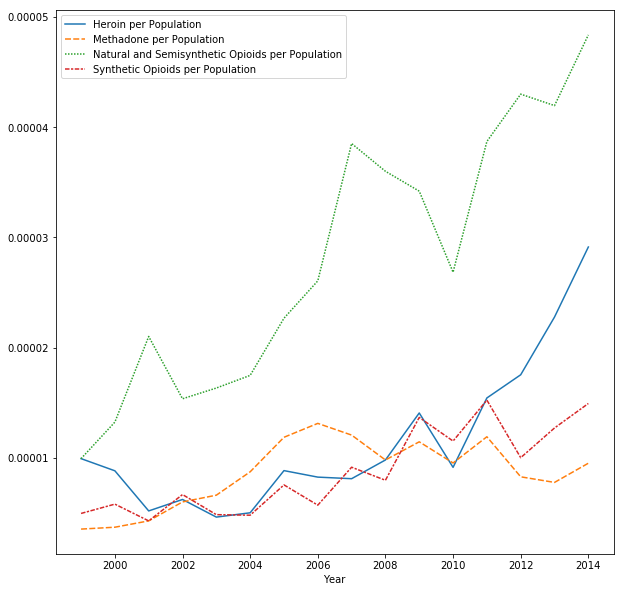

In [137]:
per_pop = ['Heroin per Population', 'Methadone per Population',
           'Natural and Semisynthetic Opioids per Population', 'Synthetic Opioids per Population']

plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Colorado'].groupby('Year').sum())
plt.show()

In [138]:
df_death['State'].value_counts()

Missouri          16
New Mexico        16
Florida           16
Arizona           16
North Carolina    16
Texas             16
Wisconsin         16
Nevada            16
Michigan          16
Washington        16
Colorado          16
California        16
New York          16
Pennsylvania      16
Virginia          16
Illinois          16
Massachusetts     15
New Jersey        15
Ohio              15
Oregon            14
Utah              14
Maryland          12
Connecticut       11
West Virginia      9
Indiana            9
South Carolina     8
Georgia            8
Louisiana          8
Tennessee          8
New Hampshire      7
Kentucky           7
Minnesota          6
Oklahoma           6
Delaware           5
Alabama            5
Iowa               5
Kansas             4
Rhode Island       3
Maine              3
Mississippi        1
Vermont            1
Alaska             1
Idaho              1
Name: State, dtype: int64

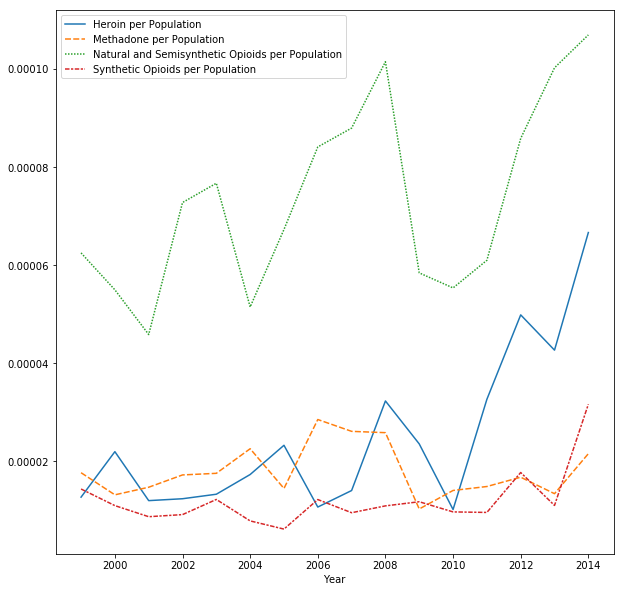

In [139]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'New Mexico'].groupby('Year').sum())
plt.show()

In [140]:
neigh_states = ['Kansas', 'Nebraska', 'Wyoming', 'Utah', 'Arizona', 'New Mexico']

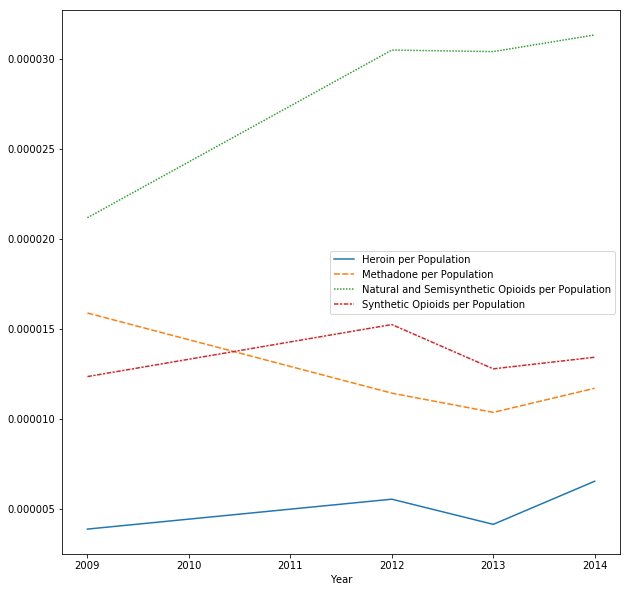

In [141]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Kansas'].groupby('Year').sum())
plt.show()

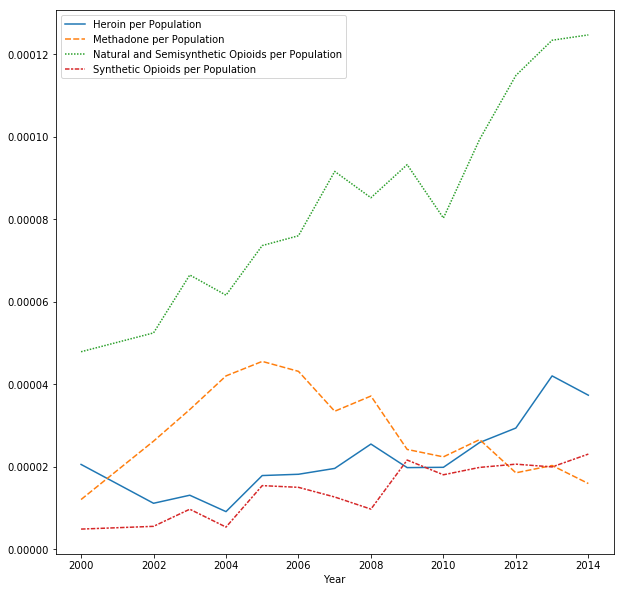

In [142]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Utah'].groupby('Year').sum())
plt.show()

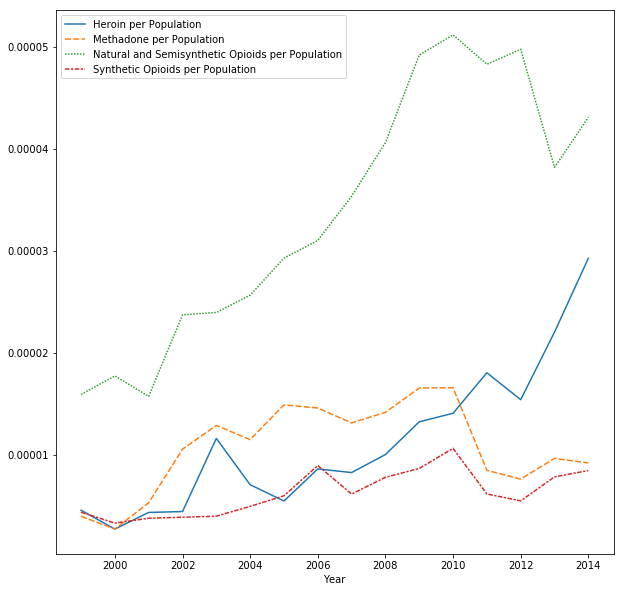

In [143]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_death[per_pop + ['Year']][df_death['State'] == 'Arizona'].groupby('Year').sum())
plt.show()

In [144]:
df_death_2014 = df_death[df_death['Year'] == 2014]
df_death_2014 = df_death_2014.drop('Year', axis=1)
df_death_2014.head()

,State,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
4,Alabama,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010
5,Alaska,79.0,736732.0,0.000107,25.0,12.0,40.0,14.0,0.000034,0.000016,0.000054,0.000019
21,Arizona,616.0,6731484.0,0.000092,197.0,62.0,290.0,57.0,0.000029,0.000009,0.000043,0.000008
37,California,2159.0,38802500.0,0.000056,561.0,337.0,1047.0,194.0,0.000014,0.000009,0.000027,0.000005
53,Colorado,532.0,5355866.0,0.000099,156.0,51.0,259.0,80.0,0.000029,0.000010,0.000048,0.000015


In [145]:
df_death_2014['Deaths per Population'].max()

0.0003161605036085533

In [146]:
df_death_2014['Deaths per Population'].min()

4.5220235903472494e-05

In [147]:
df_death_2014['Deaths per Population'].dtype

dtype('float64')

In [148]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [149]:
'''
import plotly.plotly as py
import plotly.graph_objs as go

df = df_death_2009

df['code'] = ''

for state in df['State']:
    df['code'][df['State'] == state] = us_state_abbrev[state]

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['State']

data = [go.Choropleth(
    locations=df['code'],
    z=df['Deaths'],
    locationmode='USA-states',
    marker=go.choropleth.Marker(
        line=go.choropleth.marker.Line(color='rgb(255, 255, 255)',
                                       width=2)
    ),
    colorbar=go.choropleth.ColorBar(title='Deaths')
)]

layout = go.Layout(
    title=go.layout.Title(text='2009 Overdose Deaths by State'),
    geo=go.layout.Geo(scope='usa',
                      projection=go.layout.geo.Projection(type='albers usa'),
                      showlakes=True,
                      lakecolor='rgb(255, 255, 255)'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='deaths-2009')
'''

"\nimport plotly.plotly as py\nimport plotly.graph_objs as go\n\ndf = df_death_2009\n\ndf['code'] = ''\n\nfor state in df['State']:\n    df['code'][df['State'] == state] = us_state_abbrev[state]\n\nfor col in df.columns:\n    df[col] = df[col].astype(str)\n\ndf['text'] = df['State']\n\ndata = [go.Choropleth(\n    locations=df['code'],\n    z=df['Deaths'],\n    locationmode='USA-states',\n    marker=go.choropleth.Marker(\n        line=go.choropleth.marker.Line(color='rgb(255, 255, 255)',\n                                       width=2)\n    ),\n    colorbar=go.choropleth.ColorBar(title='Deaths')\n)]\n\nlayout = go.Layout(\n    title=go.layout.Title(text='2009 Overdose Deaths by State'),\n    geo=go.layout.Geo(scope='usa',\n                      projection=go.layout.geo.Projection(type='albers usa'),\n                      showlakes=True,\n                      lakecolor='rgb(255, 255, 255)'))\n\nfig = go.Figure(data=data, layout=layout)\npy.iplot(fig, filename='deaths-2009')\n"

In [150]:
df_death_2009 = df_death[df_death['Year'] == 2009]
df_death_2009 = df_death_2009.drop('Year', axis=1)
df_death_2009.head()

,State,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007
16,Arizona,625.0,6343154.0,0.000099,84.0,105.0,312.0,55.0,0.000013,0.000017,0.000049,0.000009
32,California,2128.0,36961229.0,0.000058,352.0,426.0,1147.0,201.0,0.000010,0.000012,0.000031,0.000005
48,Colorado,412.0,4972195.0,0.000083,70.0,57.0,170.0,68.0,0.000014,0.000011,0.000034,0.000014
59,Connecticut,220.0,3561807.0,0.000062,99.0,42.0,31.0,20.0,0.000028,0.000012,0.000009,0.000006


In [151]:
corr_matrix = df_death.corr()

In [152]:
corr_matrix['Deaths per Population'].sort_values(ascending=False)

Deaths per Population                               1.000000
Natural and Semisynthetic Opioids per Population    0.893027
Synthetic Opioids per Population                    0.743982
Methadone per Population                            0.632086
Heroin per Population                               0.580676
Year                                                0.451349
Synthetic Opioids                                   0.159500
Natural and Semisynthetic Opioids                   0.110890
Heroin                                              0.052774
Deaths                                              0.032844
Methadone                                          -0.026247
Population                                         -0.402543
Name: Deaths per Population, dtype: float64

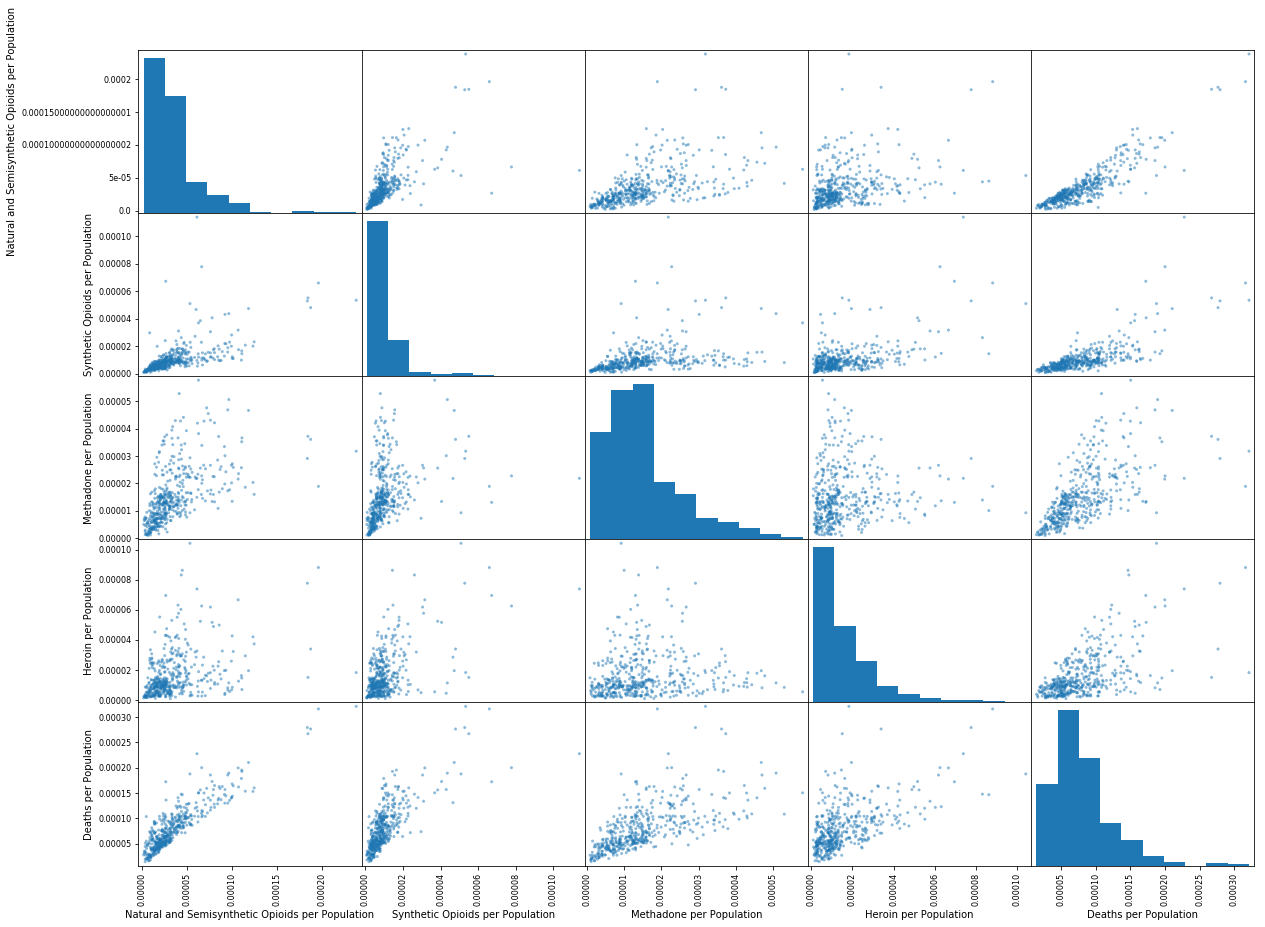

In [153]:
from pandas.plotting import scatter_matrix

attributes = ['Natural and Semisynthetic Opioids per Population', 'Synthetic Opioids per Population',
              'Methadone per Population', 'Heroin per Population', 'Deaths per Population']

scatter_matrix(df_death[attributes], figsize=(20, 15))
plt.show()

In [154]:
import statsmodels.api as sm

df_death_state = df_death[['Year', 'Natural and Semisynthetic Opioids per Population']][df_death['State'] == 'Colorado']

y = df_death_state['Natural and Semisynthetic Opioids per Population']
x1 = df_death_state['Year']

x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Natural and Semisynthetic Opioids per Population   R-squared:                       0.870
Model:                                                          OLS   Adj. R-squared:                  0.860
Method:                                               Least Squares   F-statistic:                     93.49
Date:                                              Tue, 21 May 2019   Prob (F-statistic):           1.42e-07
Time:                                                      09:43:00   Log-Likelihood:                 175.29
No. Observations:                                                16   AIC:                            -346.6
Df Residuals:                                                    14   BIC:                            -345.0
Df Model:                                                         1                                         
Covariance Type:                                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0047      0.000     -9.612      0.000      -0.006      -0.004
Year        2.368e-06   2.45e-07      9.669      0.000    1.84e-06    2.89e-06
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.177
Skew:                           0.051   Prob(JB):                        0.915
Kurtosis:                       3.505   Cond. No.                     8.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
def calculate_slopes(source, columns):
    data = []
    
    for state in source['State'].unique():
        contents = [state]
        temp_state = source[['Year'] + columns][source['State'] == state]
        for column in columns:
            if column == 'State':
                continue
                
            y = temp_state[column]
            x1 = temp_state['Year']

            x = sm.add_constant(x1)

            results = sm.OLS(y, x).fit()
            contents.append(results.params['Year'])
        
        data.append(contents)
    
    return pd.DataFrame(columns=columns, data=data)

In [192]:
columns = ['State',
           'Deaths per Population',
           'Natural and Semisynthetic Opioids per Population',
           'Synthetic Opioids per Population']

df_growth = calculate_slopes(df_death, columns)
df_growth

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,1.694005e-06,-6.707791e-07,5.422681e-07
1,Alaska,5.324246e-08,2.695821e-08,9.435372e-09
2,Arizona,3.213424e-06,2.374460e-06,3.341479e-07
3,California,1.492489e-06,6.312769e-07,1.989103e-07
4,Colorado,3.555329e-06,2.368383e-06,6.987451e-07
5,Connecticut,6.279389e-06,2.814096e-06,1.486392e-06
6,Delaware,6.284313e-07,-5.619924e-06,4.024239e-06
7,Florida,2.766930e-06,2.340372e-06,3.708002e-07
8,Georgia,3.076654e-06,2.761791e-06,8.655414e-07
9,Idaho,2.430274e-08,1.275894e-08,3.949195e-09


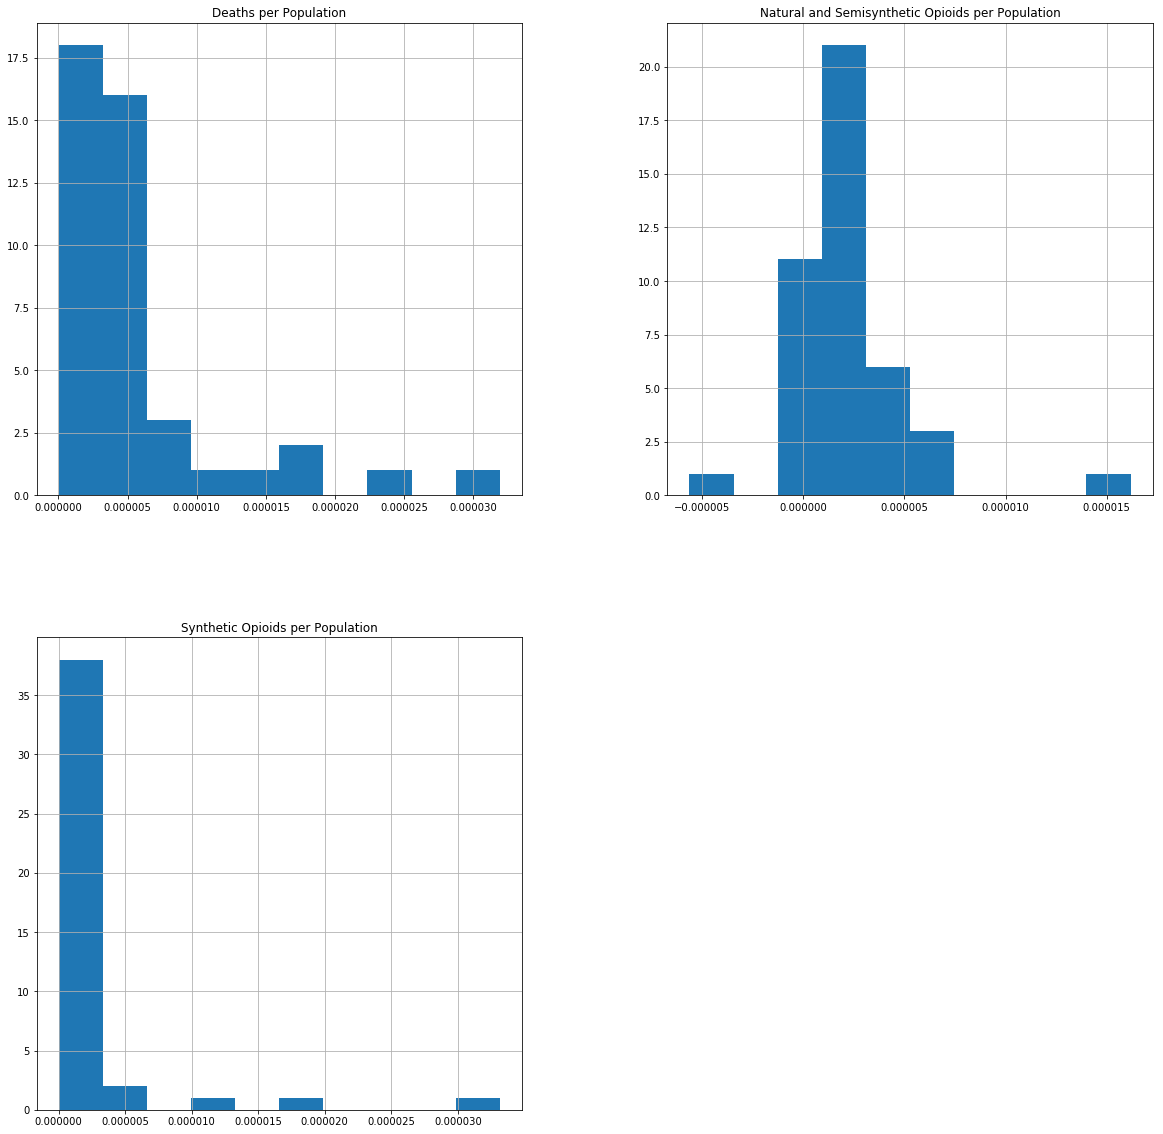

In [157]:
df_growth.hist(figsize=(20, 20))
plt.show()

In [158]:
df_growth[df_growth['State'] == 'Colorado']

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
4,Colorado,0.000004,0.000002,6.987451e-07


In [159]:
df_growth[df_growth['Synthetic Opioids per Population'] > df_growth['Natural and Semisynthetic Opioids per Population']]

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
0,Alabama,1.694005e-06,-6.707791e-07,5.422681e-07
6,Delaware,6.284313e-07,-5.619924e-06,4.024239e-06
14,Kentucky,1.342906e-05,3.104546e-06,3.540683e-06
16,Maine,2.515914e-05,7.126904e-06,1.766419e-05
18,Massachusetts,4.858412e-06,1.503894e-06,2.104957e-06
20,Minnesota,2.205364e-06,-1.270581e-07,6.751951e-08
24,New Hampshire,1.892545e-05,3.396092e-06,1.153095e-05
33,Rhode Island,3.190730e-05,-1.106266e-06,3.314349e-05


In [160]:
stats = df_growth.describe()
stats

,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,5.587490e-06,2.292066e-06,2.226802e-06
std,6.616102e-06,3.038671e-06,5.753087e-06
min,1.710594e-08,-5.619924e-06,3.949195e-09
25%,1.925757e-06,7.690910e-07,3.149857e-07
50%,3.594052e-06,2.109742e-06,6.987451e-07
75%,5.918920e-06,2.788691e-06,1.152148e-06
max,3.190730e-05,1.617616e-05,3.314349e-05


In [161]:
df_growth[df_growth['Deaths per Population'] > stats.loc['50%', 'Deaths per Population']]

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
5,Connecticut,0.000006,0.000003,1.486392e-06
11,Indiana,0.000004,0.000001,3.098576e-07
14,Kentucky,0.000013,0.000003,3.540683e-06
16,Maine,0.000025,0.000007,1.766419e-05
18,Massachusetts,0.000005,0.000002,2.104957e-06
19,Michigan,0.000006,0.000002,7.031660e-07
22,Missouri,0.000007,0.000002,7.708084e-07
23,Nevada,0.000006,0.000005,2.299741e-07
24,New Hampshire,0.000019,0.000003,1.153095e-05
26,New Mexico,0.000005,0.000002,5.525926e-07


In [162]:
df_growth[df_growth['Natural and Semisynthetic Opioids per Population'] > stats.loc['50%', 'Natural and Semisynthetic Opioids per Population']]

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
2,Arizona,0.000003,0.000002,3.341479e-07
4,Colorado,0.000004,0.000002,6.987451e-07
5,Connecticut,0.000006,0.000003,1.486392e-06
7,Florida,0.000003,0.000002,3.708002e-07
8,Georgia,0.000003,0.000003,8.655414e-07
14,Kentucky,0.000013,0.000003,3.540683e-06
16,Maine,0.000025,0.000007,1.766419e-05
17,Maryland,0.000004,0.000005,1.971669e-06
22,Missouri,0.000007,0.000002,7.708084e-07
23,Nevada,0.000006,0.000005,2.299741e-07


In [163]:
df_growth[df_growth['Synthetic Opioids per Population'] > stats.loc['50%', 'Synthetic Opioids per Population']]

,State,Deaths per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
5,Connecticut,6.279389e-06,0.000003,1.486392e-06
6,Delaware,6.284313e-07,-0.000006,4.024239e-06
8,Georgia,3.076654e-06,0.000003,8.655414e-07
14,Kentucky,1.342906e-05,0.000003,3.540683e-06
16,Maine,2.515914e-05,0.000007,1.766419e-05
17,Maryland,3.514334e-06,0.000005,1.971669e-06
18,Massachusetts,4.858412e-06,0.000002,2.104957e-06
19,Michigan,5.782237e-06,0.000002,7.031660e-07
22,Missouri,6.770193e-06,0.000002,7.708084e-07
24,New Hampshire,1.892545e-05,0.000003,1.153095e-05


In [164]:
# df_growth.to_csv('datasets/bdc/growth.csv')

In [165]:
crime.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN


In [166]:
df_death['Year'].min()

1999

In [167]:
crime[crime['ORI'].str.startswith('CO', na=False)]

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN
15,CODPD00,1975,Denver,508140.0,74.0,480.0,2568.0,1838.0,4960.0,12.0,976.108946,14.562916,94.462156,505.372535,361.711339,NaN,NaN
72,CO00101,1976,"Aurora, Colo.",132000.0,2.0,40.0,166.0,338.0,546.0,12.0,413.636364,1.515152,30.303030,125.757576,256.060606,NaN,NaN
84,CODPD00,1976,Denver,523676.0,86.0,383.0,2042.0,1596.0,4107.0,12.0,784.263552,16.422368,73.136825,389.935762,304.768597,NaN,NaN
141,CO00101,1977,"Aurora, Colo.",137200.0,3.0,42.0,166.0,374.0,585.0,12.0,426.384840,2.186589,30.612245,120.991254,272.594752,NaN,NaN
153,CODPD00,1977,Denver,520200.0,73.0,466.0,2488.0,2005.0,5032.0,12.0,967.320261,14.033064,89.580930,478.277586,385.428681,NaN,NaN
210,CO00101,1978,"Aurora, Colo.",131499.0,12.0,83.0,232.0,504.0,831.0,12.0,631.943969,9.125545,63.118351,176.427197,383.272877,NaN,NaN
222,CODPD00,1978,Denver,485547.0,97.0,577.0,2362.0,1841.0,4877.0,12.0,1004.434174,19.977469,118.835046,486.461661,379.159999,NaN,NaN
279,CO00101,1979,"Aurora, Colo.",134224.0,9.0,78.0,351.0,595.0,1033.0,12.0,769.609012,6.705209,58.111813,261.503159,443.288831,NaN,NaN
291,CODPD00,1979,Denver,486407.0,66.0,626.0,2257.0,2169.0,5118.0,12.0,1052.205252,13.568884,128.698806,464.014704,445.922859,NaN,NaN


In [168]:
crime['State'] = ''

In [169]:
for key, value in us_state_abbrev.items():
    crime['State'][crime['ORI'].str.startswith(value, na=False)] = key

crime.head()

,ORI,year,department_name,total_pop,homs_sum,rape_sum,rob_sum,agg_ass_sum,violent_crime,months_reported,violent_per_100k,homs_per_100k,rape_per_100k,rob_per_100k,agg_ass_per_100k,source,url,State
0,NM00101,1975,"Albuquerque, N.M.",286238.0,30.0,181.0,819.0,1353.0,2383.0,12.0,832.523984,10.480789,63.234092,286.125532,472.683571,NaN,NaN,New Mexico
1,TX22001,1975,"Arlington, Texas",112478.0,5.0,28.0,113.0,132.0,278.0,12.0,247.159445,4.445314,24.893757,100.464091,117.356283,NaN,NaN,Texas
2,GAAPD00,1975,Atlanta,490584.0,185.0,443.0,3887.0,3518.0,8033.0,12.0,1637.436198,37.710158,90.300540,792.320989,717.104512,NaN,NaN,Georgia
3,CO00101,1975,"Aurora, Colo.",116656.0,7.0,44.0,171.0,389.0,611.0,12.0,523.762173,6.000549,37.717734,146.584831,333.459059,NaN,NaN,Colorado
4,TX22701,1975,"Austin, Texas",300400.0,33.0,190.0,529.0,463.0,1215.0,12.0,404.460719,10.985353,63.249001,176.098535,154.127830,NaN,NaN,Texas


In [171]:
columns = ['year', 'total_pop', 'violent_per_100k', 'rob_per_100k', 'agg_ass_per_100k', 'State']
crime_sub = crime[columns]
crime_sub.head()

,year,total_pop,violent_per_100k,rob_per_100k,agg_ass_per_100k,State
0,1975,286238.0,832.523984,286.125532,472.683571,New Mexico
1,1975,112478.0,247.159445,100.464091,117.356283,Texas
2,1975,490584.0,1637.436198,792.320989,717.104512,Georgia
3,1975,116656.0,523.762173,146.584831,333.459059,Colorado
4,1975,300400.0,404.460719,176.098535,154.127830,Texas


In [172]:
crime_sub = crime_sub.dropna()

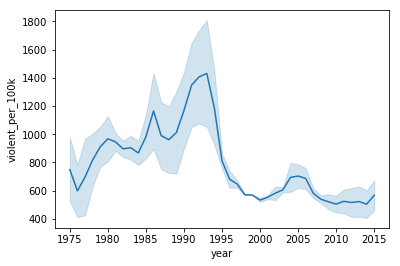

In [173]:
sns.lineplot(x='year', y='violent_per_100k', data=crime_sub[crime_sub['State'] == 'Colorado'])
plt.show()

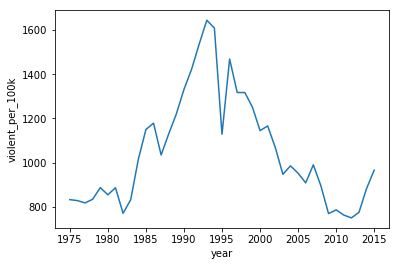

In [175]:
sns.lineplot(x='year', y='violent_per_100k', data=crime_sub[crime_sub['State'] == 'New Mexico'])
plt.show()

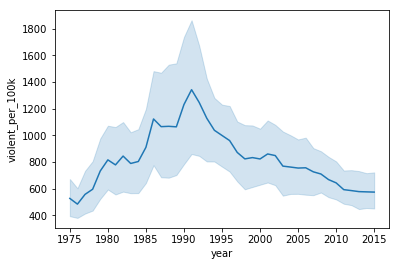

In [176]:
sns.lineplot(x='year', y='violent_per_100k', data=crime_sub[crime_sub['State'] == 'Texas'])
plt.show()

In [177]:
crime_sub = crime_sub[crime_sub['year'] > 1995]
crime_sub.shape

(1348, 6)

In [194]:
columns = crime_sub.columns.tolist()
columns[0] = 'Year'
crime_sub.columns = columns
crime_sub.head()

,Year,total_pop,violent_per_100k,rob_per_100k,agg_ass_per_100k,State
1449,1996,426736.0,1468.589479,468.205167,896.104383,New Mexico
1450,1996,298632.0,829.783814,206.943663,564.909320,Texas
1451,1996,413123.0,3315.961590,1163.091864,2010.539234,Georgia
1452,1996,262168.0,621.357298,213.222056,330.322541,Colorado
1453,1996,537484.0,710.904883,256.007621,397.221127,Texas


In [197]:
columns = ['State', 'violent_per_100k', 'rob_per_100k', 'agg_ass_per_100k']
crime_growth = calculate_slopes(crime_sub, columns)
crime_growth.head()

,State,violent_per_100k,rob_per_100k,agg_ass_per_100k
0,New Mexico,-31.268278,-11.568235,-19.697854
1,Texas,-19.106339,-6.456367,-12.054122
2,Georgia,-116.224360,-40.543761,-70.447101
3,Colorado,-5.745666,-3.627418,-2.078698
4,Maryland,-33.962953,-14.076092,-18.822598


In [200]:
crime_stats = crime_growth.describe()
crime_stats

,violent_per_100k,rob_per_100k,agg_ass_per_100k
count,32.000000,32.000000,32.000000
mean,-26.524156,-11.344582,-14.181472
std,30.006022,9.634228,20.836918
min,-116.224360,-40.543761,-70.447101
25%,-40.315421,-13.970890,-20.905463
50%,-18.480613,-9.130826,-10.721103
75%,-8.207185,-4.511213,-0.661098
max,27.552631,2.742536,24.639627


In [201]:
crime_growth[crime_growth['violent_per_100k'] > crime_stats.loc['50%', 'violent_per_100k']]

,State,violent_per_100k,rob_per_100k,agg_ass_per_100k
3,Colorado,-5.745666,-3.627418,-2.078698
6,New York,-10.369452,-7.924981,-1.983065
9,Ohio,-9.027691,-1.084858,-6.823086
10,Michigan,-15.045287,-13.025327,-0.637922
11,Virginia,-1.783034,-1.105775,-0.668823
13,Hawaii,-2.670173,-2.881810,0.513272
14,Indiana,-10.609013,-3.197735,-5.972834
17,Nevada,2.025288,-5.491232,8.144418
18,Tennessee,-17.854887,-13.935822,-1.293717
20,Wisconsin,27.552631,2.742536,24.639627


In [202]:
crime_growth[crime_growth['rob_per_100k'] > crime_stats.loc['50%', 'rob_per_100k']]

,State,violent_per_100k,rob_per_100k,agg_ass_per_100k
1,Texas,-19.106339,-6.456367,-12.054122
3,Colorado,-5.745666,-3.627418,-2.078698
6,New York,-10.369452,-7.924981,-1.983065
9,Ohio,-9.027691,-1.084858,-6.823086
11,Virginia,-1.783034,-1.105775,-0.668823
12,California,-26.180453,-6.942708,-18.235760
13,Hawaii,-2.670173,-2.881810,0.513272
14,Indiana,-10.609013,-3.197735,-5.972834
17,Nevada,2.025288,-5.491232,8.144418
19,Arizona,-19.484369,-4.610421,-14.956860


In [203]:
crime_growth[crime_growth['agg_ass_per_100k'] > crime_stats.loc['50%', 'agg_ass_per_100k']]

,State,violent_per_100k,rob_per_100k,agg_ass_per_100k
3,Colorado,-5.745666,-3.627418,-2.078698
6,New York,-10.369452,-7.924981,-1.983065
9,Ohio,-9.027691,-1.084858,-6.823086
10,Michigan,-15.045287,-13.025327,-0.637922
11,Virginia,-1.783034,-1.105775,-0.668823
13,Hawaii,-2.670173,-2.881810,0.513272
14,Indiana,-10.609013,-3.197735,-5.972834
17,Nevada,2.025288,-5.491232,8.144418
18,Tennessee,-17.854887,-13.935822,-1.293717
20,Wisconsin,27.552631,2.742536,24.639627


In [204]:
crime_sub_2012 = crime_sub[crime_sub['Year'] >= 2012]
crime_sub_2012.shape

(269, 6)

In [205]:
df_death_2012 = df_death[df_death['Year'] >= 2012]
df_death_2012.shape

(121, 13)

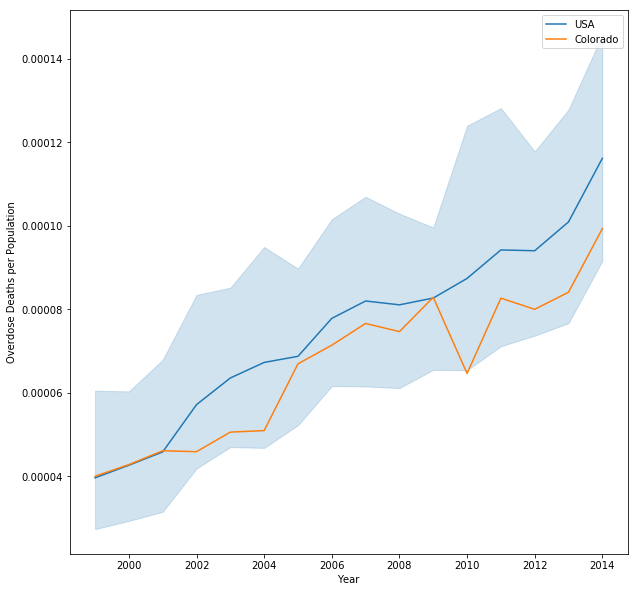

In [314]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Deaths per Population', data=df_death, label='USA', ci=100)
ax = sns.lineplot(x='Year', y='Deaths per Population', data=df_death[df_death['State'] == 'Colorado'], label='Colorado')
plt.ylabel('Overdose Deaths per Population')
plt.show()

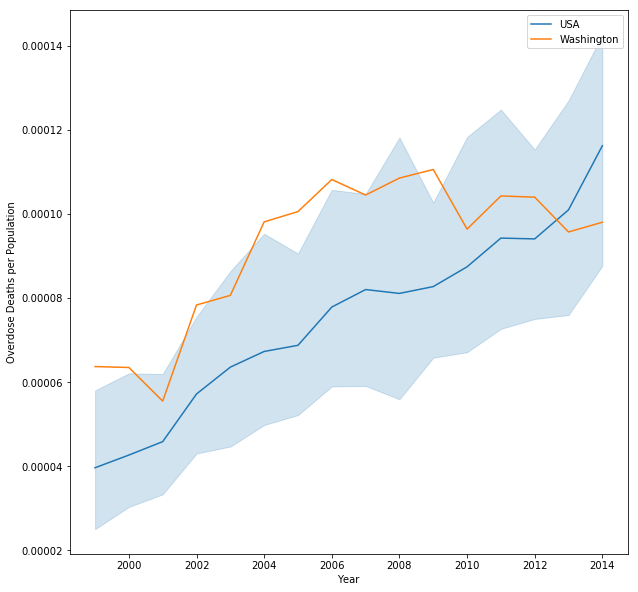

In [316]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Deaths per Population', data=df_death, label='USA', ci=100)
ax = sns.lineplot(x='Year', y='Deaths per Population', data=df_death[df_death['State'] == 'Washington'], label='Washington')
plt.ylabel('Overdose Deaths per Population')
plt.show()

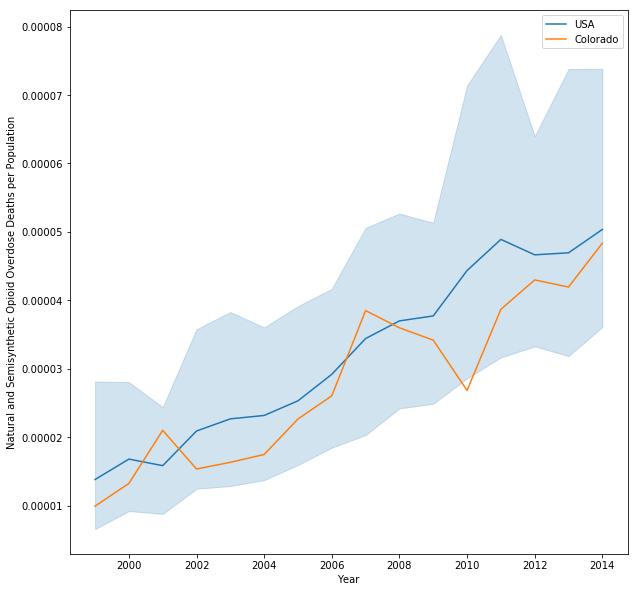

In [317]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Natural and Semisynthetic Opioids per Population', data=df_death, label='USA', ci=100)
ax = sns.lineplot(x='Year', y='Natural and Semisynthetic Opioids per Population', data=df_death[df_death['State'] == 'Colorado'], label='Colorado')
plt.ylabel('Natural and Semisynthetic Opioid Overdose Deaths per Population')
plt.show()

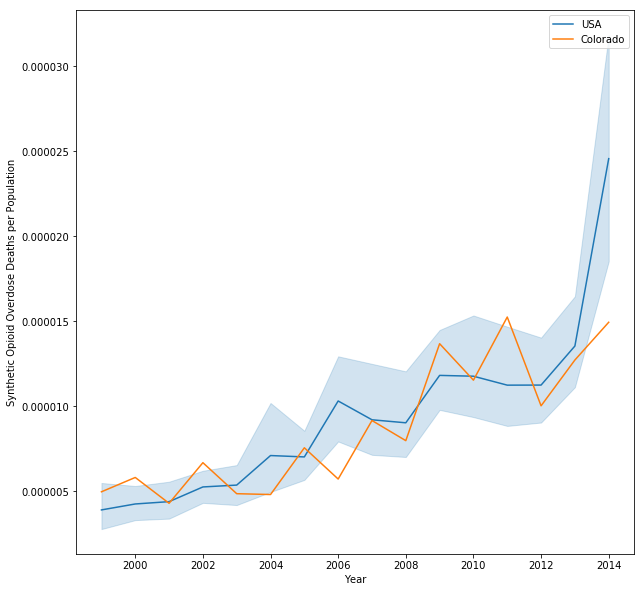

In [220]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Synthetic Opioids per Population', data=df_death, label='USA')
ax = sns.lineplot(x='Year', y='Synthetic Opioids per Population', data=df_death[df_death['State'] == 'Colorado'], label='Colorado')
plt.ylabel('Synthetic Opioid Overdose Deaths per Population')
plt.show()

In [221]:
crime_sub_col = crime_sub[crime_sub['State'] == 'Colorado']
crime_sub_col.head()

,Year,total_pop,violent_per_100k,rob_per_100k,agg_ass_per_100k,State
1452,1996,262168.0,621.357298,213.222056,330.322541,Colorado
1464,1996,516224.0,742.313414,257.058951,403.507005,Colorado
1521,1997,266967.0,621.050542,187.663644,343.488146,Colorado
1533,1997,525793.0,672.317813,238.306710,353.180815,Colorado
1590,1998,262465.0,569.980759,181.738518,305.564551,Colorado


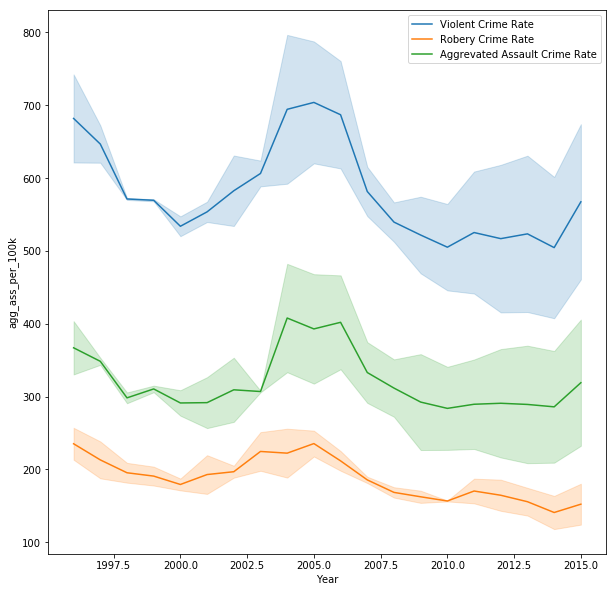

In [223]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='violent_per_100k', label='Violent Crime Rate', data=crime_sub_col)
ax = sns.lineplot(x='Year', y='rob_per_100k', label='Robery Crime Rate', data=crime_sub_col)
ax = sns.lineplot(x='Year', y='agg_ass_per_100k', label='Aggrevated Assault Crime Rate', data=crime_sub_col)
plt.show()

In [280]:
deaths = pd.read_csv('./datasets/bdc/opioid-overdose-death-rates-and-all-drug-overdose-death-rates-per-population.csv',
                     sep=';')

deaths.shape

(867, 10)

In [281]:
deaths.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,New Jersey,2014,14.0,NaN,8.2,NaN,-0.03,NaN,0.08,NaN
1,Virginia,2014,11.7,NaN,9.1,NaN,0.15,NaN,0.20,NaN
2,Arkansas,2015,13.8,NaN,7.2,NaN,0.10,NaN,0.14,NaN
3,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
4,Missouri,2011,16.4,NaN,10.2,NaN,-0.04,NaN,-0.01,NaN


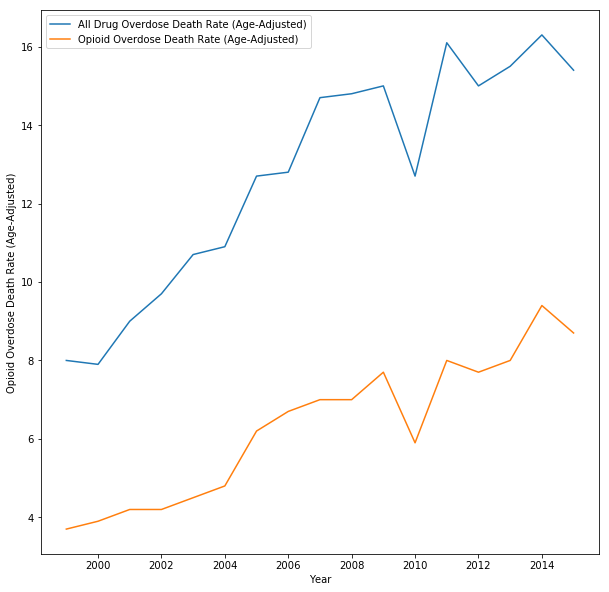

In [282]:
deaths_col = deaths[deaths['Location'] == 'Colorado']

all_label = 'All Drug Overdose Death Rate (Age-Adjusted)'
opioid_label = 'Opioid Overdose Death Rate (Age-Adjusted)'
opioid_per_label = 'Percent Change in Opioid Overdose Death Rate from Prior Year'

plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=all_label, data=deaths_col, label=all_label)
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths_col, label=opioid_label)
plt.show()

https://public.opendatasoft.com/explore/dataset/fatal-motor-vehicle-accidents/table/?sort=-year

In [229]:
accidents = pd.read_csv('./datasets/bdc/fatal-motor-vehicle-accidents.csv', sep=';')
accidents.head()

,State,State Case,Number of vehicles involved,Number of Motor Vehicles in Transport (MVIT),Number of Parked/Working Vehicles,Number of Forms Submitted for Persons Not in Motor Vehicles,Number of Persons Not in Motor Vehicles in Transport (MVIT),Number of Persons in Motor Vehicles in Transport (MVIT),Number of Forms Submitted for Persons in Motor Vehicles,County,...,Hour of EMS Notification,Minute of EMS Notification,EMS Arrival Hour,EMS Arrival Minute,EMS Arrival at Hospital Hour,Crash Related Factor 1,Crash Related Factor 2,Crash Related Factor 3,City Name/County Name,EMS Arrival at Hospital Minute
0,22,220548,1,1,0,0,0,1,1,99,...,10:00pm-10:59pm,15,10:00pm-10:59pm,24,NaN,None,None,None,PARKS,Not Applicable (Not Transported)
1,22,220576,1,1,0,0,0,1,1,55,...,1:00am-1:59am,54,2:00am-2:59am,1,5:00pm-5:59pm,None,None,None,BROUSSARD,17
2,22,220613,1,1,0,0,0,2,2,71,...,10:00am-10:59am,13,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,NaN,None,None,None,NEW ORLEANS,Unknown EMS Hospital Arrival Time
3,22,220654,1,1,0,0,0,1,1,37,...,Unknown,Unknown,Unknown EMS Scene Arrival Hour,Unknown EMS Scene Arrival Minutes,NaN,None,None,None,CLINTON,Unknown EMS Hospital Arrival Time
4,23,230008,1,1,0,0,0,1,1,11,...,0:00am-0:59am,30,0:00am-0:59am,43,NaN,None,None,None,VIENNA,Not Applicable (Not Transported)


In [231]:
for column in accidents.columns:
    if 'Drunk' in column:
        print(column)

Number of Drunk Drivers Involved


In [233]:
columns = ['Year of Crash', 'State Name', 'Number of Fatalities', 'Number of Drunk Drivers Involved']

accidents = accidents[columns]
accidents.head()

,Year of Crash,State Name,Number of Fatalities,Number of Drunk Drivers Involved
0,2013,Louisiana,1,1
1,2013,Louisiana,1,1
2,2013,Louisiana,1,0
3,2013,Louisiana,1,0
4,2013,Maine,1,0


In [234]:
accidents_col = accidents[accidents['State Name'] == 'Colorado']
accidents_col.head()

,Year of Crash,State Name,Number of Fatalities,Number of Drunk Drivers Involved
681,2014,Colorado,2,1
682,2014,Colorado,1,0
683,2014,Colorado,1,0
684,2014,Colorado,1,1
685,2014,Colorado,1,1


In [235]:
accidents_col = accidents_col.groupby('Year of Crash', as_index=False).sum()
accidents_col.head()

,Year of Crash,Number of Fatalities,Number of Drunk Drivers Involved
0,2011,447,154
1,2012,474,143
2,2013,482,152
3,2014,488,163
4,2015,546,176


In [237]:
accidents_col.shape

(5, 3)

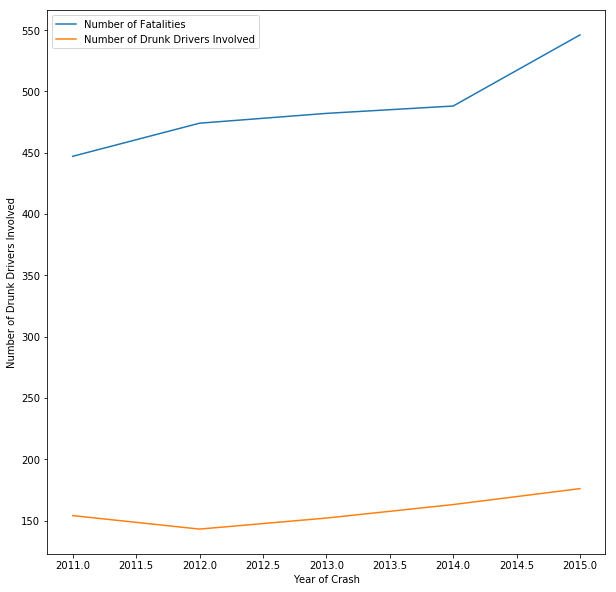

In [239]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year of Crash', y='Number of Fatalities', data=accidents_col, label='Number of Fatalities')
ax = sns.lineplot(x='Year of Crash', y='Number of Drunk Drivers Involved', data=accidents_col, label='Number of Drunk Drivers Involved')
plt.show()

In [240]:
df_death_2012[df_death_2012['State'] == 'Colorado']

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population
51,Colorado,2012,415.0,5187582.0,0.000080,91.0,43.0,223.0,52.0,0.000018,0.000008,0.000043,0.000010
52,Colorado,2013,443.0,5268367.0,0.000084,120.0,41.0,221.0,67.0,0.000023,0.000008,0.000042,0.000013
53,Colorado,2014,532.0,5355866.0,0.000099,156.0,51.0,259.0,80.0,0.000029,0.000010,0.000048,0.000015


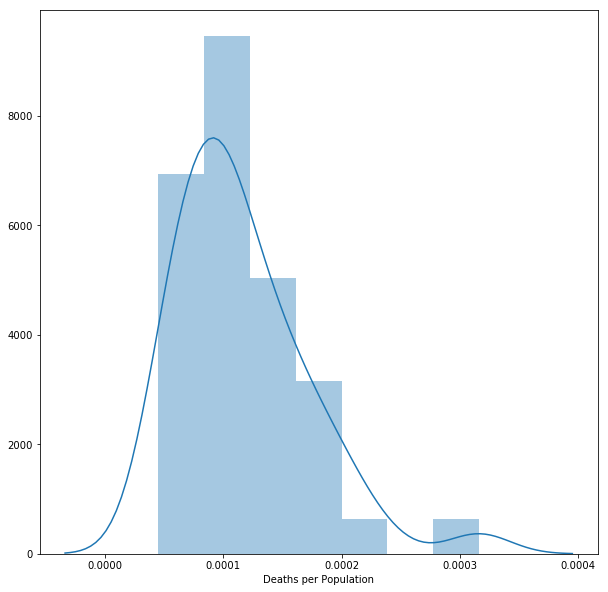

In [256]:
plt.figure(figsize=(10, 10))
sns.distplot(df_death_2012['Deaths per Population'][df_death_2012['Year'] == 2014])
plt.show()

In [246]:
deaths.head()

,Location,Year,All Drug Overdose Death Rate (Age-Adjusted),All Drug Overdose Death Rate (Age-Adjusted) (missing reason),Opioid Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted) (missing reason),Percent Change in All Drug Overdose Death Rate from Prior Year,Percent Change in All Drug Overdose Death Rate from Prior Year (missing reason),Percent Change in Opioid Overdose Death Rate from Prior Year,Percent Change in Opioid Overdose Death Rate from Prior Year (missing reason)
0,New Jersey,2014,14.0,NaN,8.2,NaN,-0.03,NaN,0.08,NaN
1,Virginia,2014,11.7,NaN,9.1,NaN,0.15,NaN,0.20,NaN
2,Arkansas,2015,13.8,NaN,7.2,NaN,0.10,NaN,0.14,NaN
3,Maryland,2012,13.7,NaN,10.9,NaN,0.17,NaN,0.20,NaN
4,Missouri,2011,16.4,NaN,10.2,NaN,-0.04,NaN,-0.01,NaN


In [283]:
deaths = deaths[['Year', 'Location', all_label, opioid_label, opioid_per_label]]
deaths.head()

,Year,Location,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in Opioid Overdose Death Rate from Prior Year
0,2014,New Jersey,14.0,8.2,0.08
1,2014,Virginia,11.7,9.1,0.20
2,2015,Arkansas,13.8,7.2,0.14
3,2012,Maryland,13.7,10.9,0.20
4,2011,Missouri,16.4,10.2,-0.01


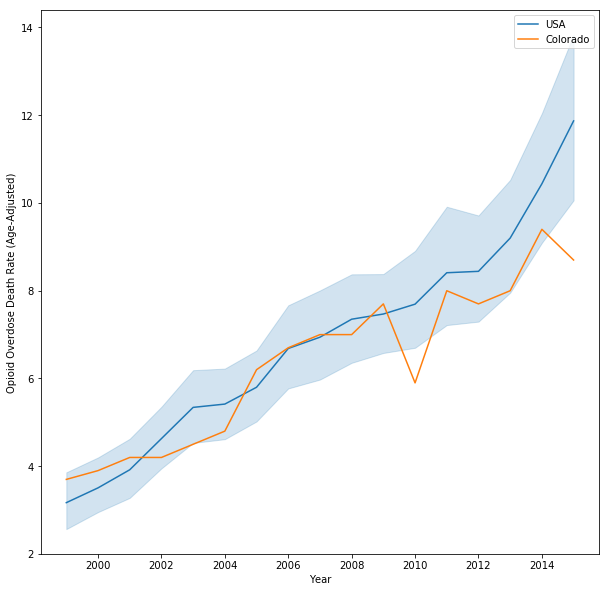

In [252]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths, label='USA')
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths[deaths['Location'] == 'Colorado'], label='Colorado')
plt.show()

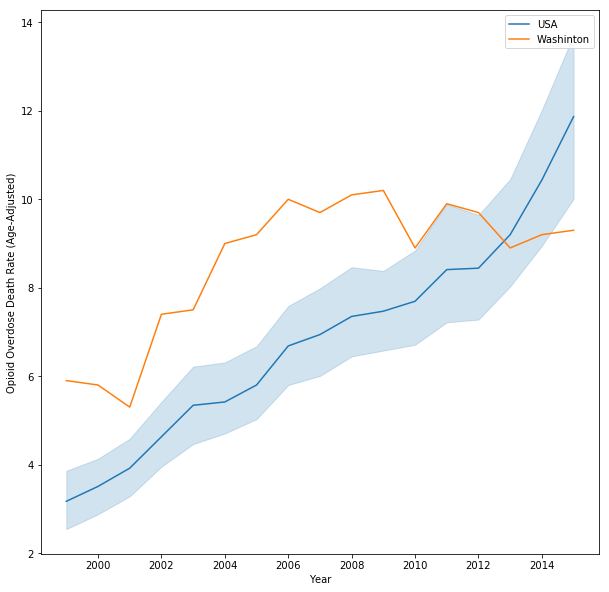

In [289]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths, label='USA')
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths[deaths['Location'] == 'Washington'], label='Washinton')
plt.show()

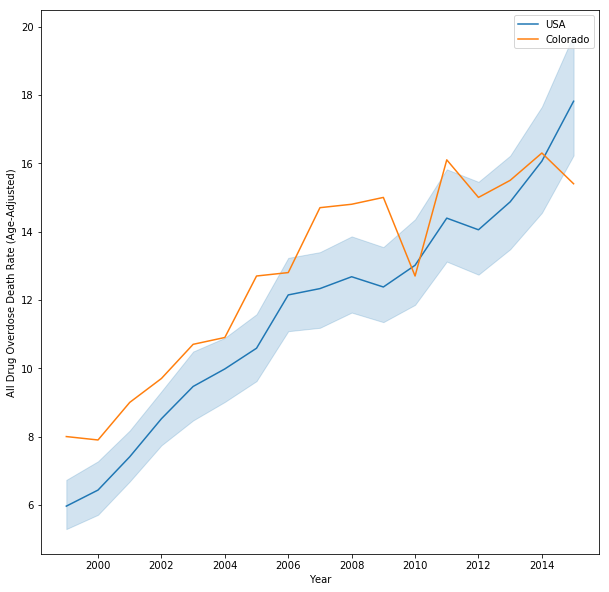

In [253]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=all_label, data=deaths, label='USA')
ax = sns.lineplot(x='Year', y=all_label, data=deaths[deaths['Location'] == 'Colorado'], label='Colorado')
plt.show()

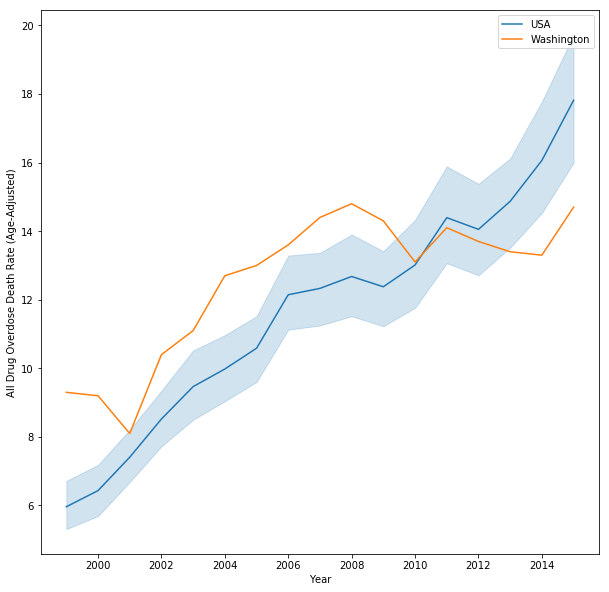

In [290]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=all_label, data=deaths, label='USA')
ax = sns.lineplot(x='Year', y=all_label, data=deaths[deaths['Location'] == 'Washington'], label='Washington')
plt.show()

In [257]:
death_stats = deaths.describe()
death_stats

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted)
count,867.000000,858.000000,823.000000
mean,2007.000000,11.680536,6.938032
std,4.901807,5.386337,4.529253
min,1999.000000,1.900000,0.700000
25%,2003.000000,7.900000,3.950000
50%,2007.000000,11.100000,5.900000
75%,2011.000000,14.400000,8.950000
max,2015.000000,41.500000,36.000000


In [259]:
deaths_2012_p = deaths[deaths['Year'] >= 2012]
deaths_2012_p_stats = deaths_2012_p.describe()
deaths_2012_p_stats

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted)
count,204.000000,204.000000,202.000000
mean,2013.500000,15.700490,9.999010
std,1.120784,5.860929,5.658586
min,2012.000000,2.800000,2.200000
25%,2012.750000,11.900000,5.900000
50%,2013.500000,14.500000,8.700000
75%,2014.250000,18.700000,12.300000
max,2015.000000,41.500000,36.000000


In [267]:
deaths_2015 = deaths[deaths['Year'] == 2015]
deaths_2015_stats = deaths_2015.describe()
deaths_2015['Location'][deaths_2015[opioid_label] < deaths_2015_stats.loc['50%', opioid_label]].unique()

array(['Arkansas', 'Arizona', 'California', 'Iowa', 'Virginia', 'Alabama',
       'New Jersey', 'Washington', 'Kansas', 'South Dakota', 'Texas',
       'Mississippi', 'Oregon', 'Louisiana', 'Hawaii', 'Colorado',
       'Nebraska', 'Indiana', 'Montana', 'Minnesota', 'Florida',
       'North Dakota', 'Idaho', 'Wyoming', 'Georgia'], dtype=object)

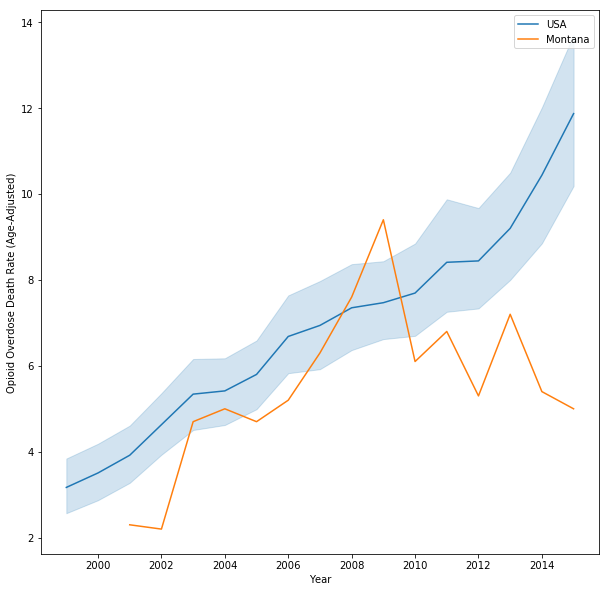

In [291]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths, label='USA')
ax = sns.lineplot(x='Year', y=opioid_label, data=deaths[deaths['Location'] == 'Montana'], label='Montana')
plt.show()

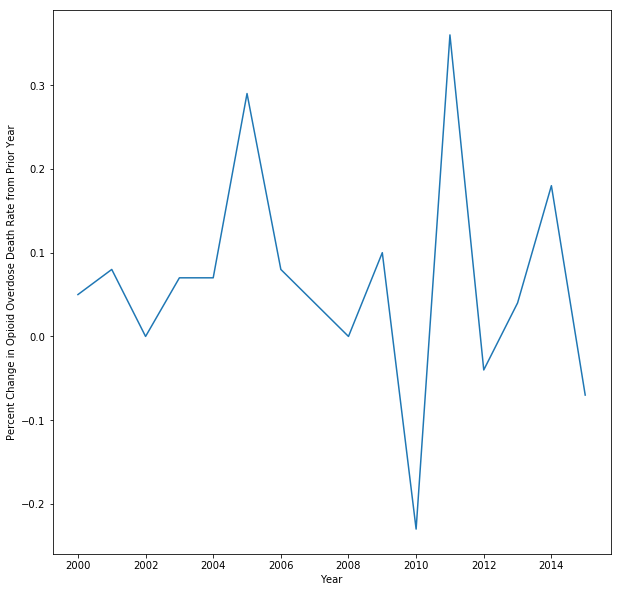

In [285]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y=opioid_per_label, data=deaths[deaths['Location'] == 'Colorado'])
plt.show()

In [343]:
medical = {'California': 1996, 'Oregon': 1998, 'Alaska': 1998, 'Washington': 1998, 'Maine': 1999,
           'Hawaii': 2000, 'Nevada': 2000, 'Colorado': 2000, 'Vermont': 2004, 'Montana': 2004, 
           'Rhode Island': 2006, 'New Mexicon': 2007, 'Michigan': 2008, 'New Jersey': 2010,
           'Arizona': 2010, 'Delaware': 2011, 'Connecticut': 2012, 'New Hampshire': 2013,
           'Illinois': 2013, 'Maryland': 2014, 'Minnesota': 2014, 'New York': 2014, 'Delaware': 2015,
           'Louisiana': 2015}
recreational = {'Colorado': 2014, 'Washington': 2012}

deaths['Medical'] = 0
deaths['Recreational'] = 0

for key, value in medical.items():
    deaths['Medical'][(deaths['Location'] == key) & (deaths['Year'] >= value)] = 1

for key, value in recreational.items():
    deaths['Recreational'][(deaths['Location'] == key) & (deaths['Year'] >= value)] = 1
    
deaths.head()

,Year,Location,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in Opioid Overdose Death Rate from Prior Year,Medical,Recreational
0,2014,New Jersey,14.0,8.2,0.08,1,0
1,2014,Virginia,11.7,9.1,0.20,0,0
2,2015,Arkansas,13.8,7.2,0.14,0,0
3,2012,Maryland,13.7,10.9,0.20,0,0
4,2011,Missouri,16.4,10.2,-0.01,0,0


In [344]:
deaths.corr()

,Year,All Drug Overdose Death Rate (Age-Adjusted),Opioid Overdose Death Rate (Age-Adjusted),Percent Change in Opioid Overdose Death Rate from Prior Year,Medical,Recreational
Year,1.000000,0.595595,0.506719,-0.119040,0.193935,0.116440
All Drug Overdose Death Rate (Age-Adjusted),0.595595,1.000000,0.903513,0.014995,0.161044,0.043433
Opioid Overdose Death Rate (Age-Adjusted),0.506719,0.903513,1.000000,0.040992,0.185215,0.042824
Percent Change in Opioid Overdose Death Rate from Prior Year,-0.119040,0.014995,0.040992,1.000000,-0.026629,-0.033255
Medical,0.193935,0.161044,0.185215,-0.026629,1.000000,0.150012
Recreational,0.116440,0.043433,0.042824,-0.033255,0.150012,1.000000


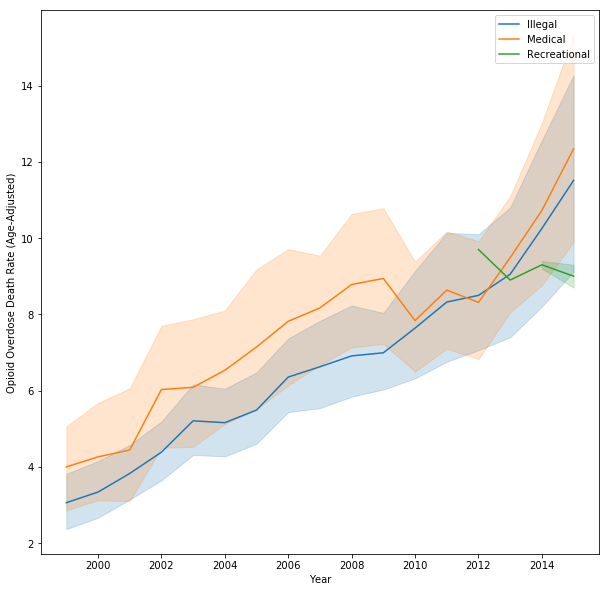

In [345]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y=opioid_label,
                  data=deaths[(deaths['Medical'] == 0) & (deaths['Recreational'] == 0)],
                  label='Illegal')
ax = sns.lineplot(x='Year', y=opioid_label,
                  data=deaths[deaths['Medical'] == 1],
                  label='Medical')
ax = sns.lineplot(x='Year', y=opioid_label,
                  data=deaths[deaths['Recreational'] == 1],
                  label='Recreational')
plt.show()

In [346]:
df_death['Medical'] = 0
df_death['Recreational'] = 0

for key, value in medical.items():
    df_death['Medical'][(df_death['State'] == key) & (df_death['Year'] >= value)] = 1

for key, value in recreational.items():
    df_death['Recreational'][(df_death['State'] == key) & (df_death['Year'] >= value)] = 1
    
df_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population,Medical,Recreational
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007,0,0
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0,0.000003,0.000013,0.000019,0.000004,0,0
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0,0.000007,0.000011,0.000013,0.000003,0,0
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0,0.000008,0.000008,0.000013,0.000006,0,0
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010,0,0


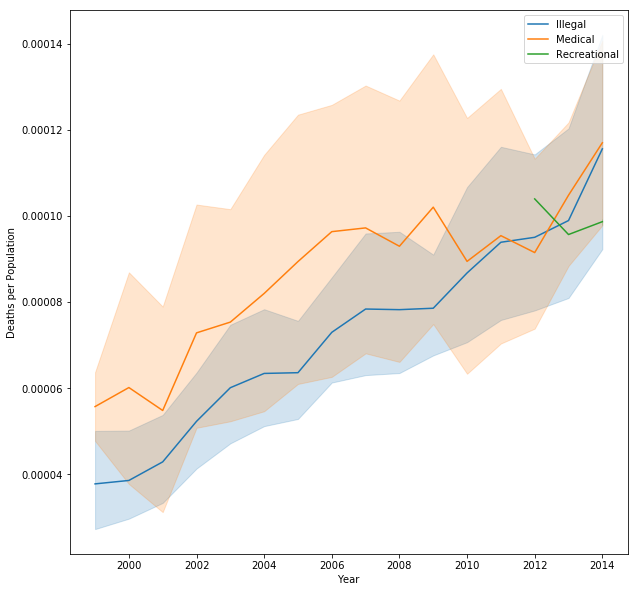

In [347]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x='Year', y='Deaths per Population',
                  data=df_death[(df_death['Medical'] == 0) & (df_death['Recreational'] == 0)],
                  label='Illegal')
ax = sns.lineplot(x='Year', y='Deaths per Population',
                  data=df_death[df_death['Medical'] == 1],
                  label='Medical')
ax = sns.lineplot(x='Year', y='Deaths per Population',
                  data=df_death[df_death['Recreational'] == 1],
                  label='Recreational')
plt.show()

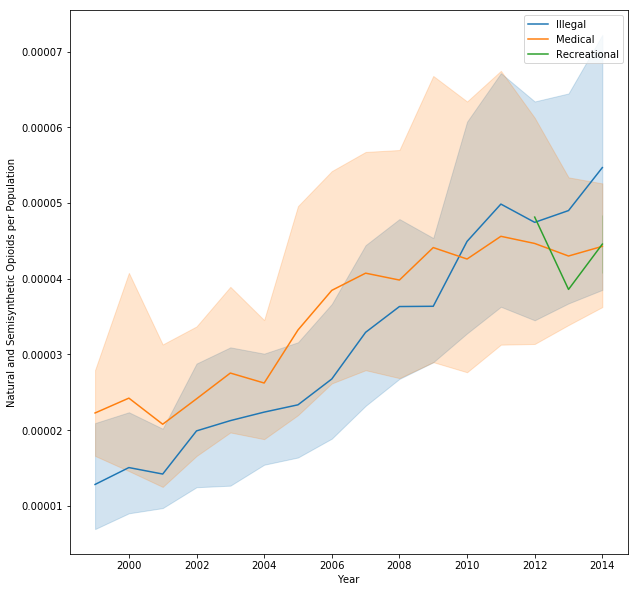

In [348]:
plt.figure(figsize=(10, 10))
label = 'Natural and Semisynthetic Opioids per Population'
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[(df_death['Medical'] == 0) & (df_death['Recreational'] == 0)],
                  label='Illegal')
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[df_death['Medical'] == 1],
                  label='Medical')
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[df_death['Recreational'] == 1],
                  label='Recreational')
plt.show()

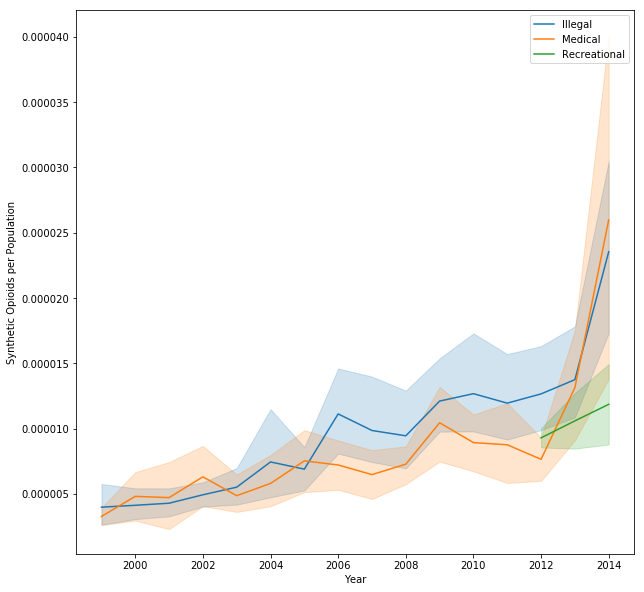

In [331]:
plt.figure(figsize=(10, 10))
label = 'Synthetic Opioids per Population'
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[(df_death['Medical'] == 0) & (df_death['Recreational'] == 0)],
                  label='Illegal')
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[df_death['Medical'] == 1],
                  label='Medical')
ax = sns.lineplot(x='Year', y=label,
                  data=df_death[df_death['Recreational'] == 1],
                  label='Recreational')
plt.show()

In [338]:
illegal_death = df_death[(df_death['Medical'] == 0) & (df_death['Recreational'] == 0)]
illegal_death.head()

,State,Year,Deaths,Population,Deaths per Population,Heroin,Methadone,Natural and Semisynthetic Opioids,Synthetic Opioids,Heroin per Population,Methadone per Population,Natural and Semisynthetic Opioids per Population,Synthetic Opioids per Population,Medical,Recreational
0,Alabama,2009,210.0,4757938.0,0.000044,12.0,88.0,92.0,31.0,0.000003,0.000018,0.000019,0.000007,0,0
1,Alabama,2011,180.0,4802740.0,0.000037,14.0,63.0,92.0,19.0,0.000003,0.000013,0.000019,0.000004,0,0
2,Alabama,2012,175.0,4822023.0,0.000036,35.0,55.0,62.0,16.0,0.000007,0.000011,0.000013,0.000003,0,0
3,Alabama,2013,175.0,4833722.0,0.000036,40.0,41.0,65.0,30.0,0.000008,0.000008,0.000013,0.000006,0,0
4,Alabama,2014,282.0,4849377.0,0.000058,122.0,44.0,90.0,47.0,0.000025,0.000009,0.000019,0.000010,0,0


In [339]:
medical_death = df_death[df_death['Medical'] == 1]
recreational_death = df_death[df_death['Recreational'] == 1]

In [340]:
illegal_death = illegal_death[['Year', 'Population', 'Natural and Semisynthetic Opioids']].groupby('Year', as_index=False).sum()
medical_death = medical_death[['Year', 'Population', 'Natural and Semisynthetic Opioids']].groupby('Year', as_index=False).sum()

In [341]:
illegal_death['rate'] = illegal_death['Natural and Semisynthetic Opioids'] / illegal_death['Population']
medical_death['rate'] = medical_death['Natural and Semisynthetic Opioids'] / medical_death['Population']

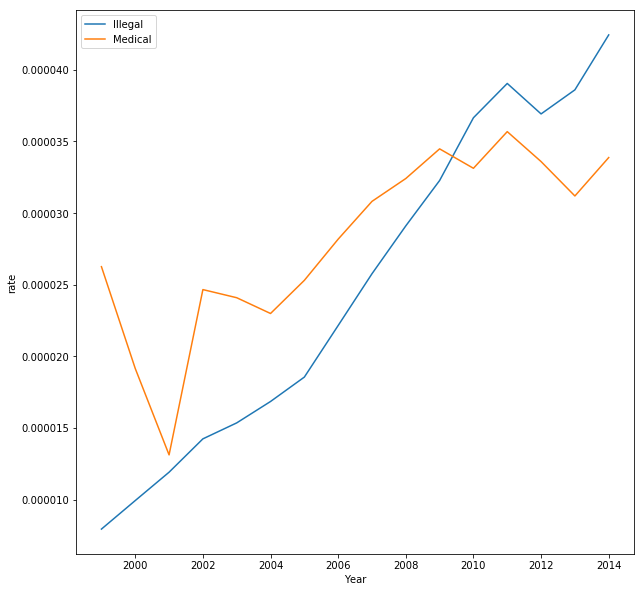

In [342]:
plt.figure(figsize=(10, 10))
label = 'rate'
ax = sns.lineplot(x='Year', y=label,
                  data=illegal_death,
                  label='Illegal')
ax = sns.lineplot(x='Year', y=label,
                  data=medical_death,
                  label='Medical')
plt.show()